In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [2]:
# Loading the dataset generated by the team
df = pd.read_csv('./data/credit_risk_dataset.csv')

# Drop the raw text column (the model can't read sentences, only numbers/categories)
# Note: Your team already extracted 'sentiment' and 'risk_category' using GenAI, so we use those instead.
df_clean = df.drop(columns=['customer_financial_statement'])

In [3]:
# List of columns that are text (Categorical)
categorical_cols = [
    'employment_type', 'education_level', 'marital_status', 
    'region', 'sentiment', 'financial_stress_level', 'risk_category'
]

# Encode them (Turn "High Risk" into 2, "Low Risk" into 0, etc.)
le = LabelEncoder()
mapping_dict = {} # To keep track of what number means what

for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])
    mapping_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

print("Data encoded successfully.")

# Define X (Features) and y (Target)
X = df_clean.drop('default_risk', axis=1)
y = df_clean['default_risk']

# Split: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")

Data encoded successfully.
Training Features Shape: (1200, 15)
Testing Features Shape: (300, 15)


In [4]:
# Initialize the model
# n_estimators=100 means we create 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest Model Trained Successfully!")

Random Forest Model Trained Successfully!


Accuracy: 0.9733333333333334
ROC-AUC Score: 0.996589653681733

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       191
           1       0.98      0.94      0.96       109

    accuracy                           0.97       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



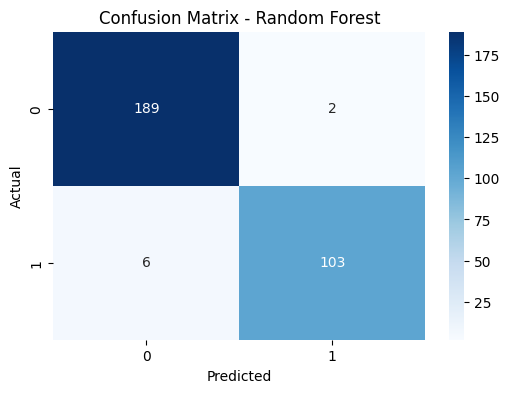

In [5]:
# Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1] # Probability for ROC-AUC

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()